In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
#ASSIGNING NUMERIC VALUES TO CATEGORIES
df['spam']=df['Category'].apply(lambda x: 1 if x =='spam' else 0 )
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
#SPLITTING DATASET INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.2)

In [7]:
X_train.head()

3730                             I'm at home. Please call
1296                            TELL HER I SAID EAT SHIT.
1270             Tee hee. Off to lecture, cheery bye bye.
1536    You have won a Nokia 7250i. This is what you g...
4954    I lost 4 pounds since my doc visit last week w...
Name: Message, dtype: object

In [8]:
Y_train.head()

3730    0
1296    0
1270    0
1536    1
4954    0
Name: spam, dtype: int64

In [15]:
#CREATING A PIPELINE OF COUNTVECTORIZER AND NAIVE BAYES CLASSIFIER
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


#CREATING PIPELINE OBJECT
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [16]:
#FITTING DATA INTO THE PIPELINE
clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [17]:
#PRINTING CLASSIFICATION REPORT
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       962
           1       0.99      0.92      0.95       153

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Text(69.0, 0.5, 'Truth')

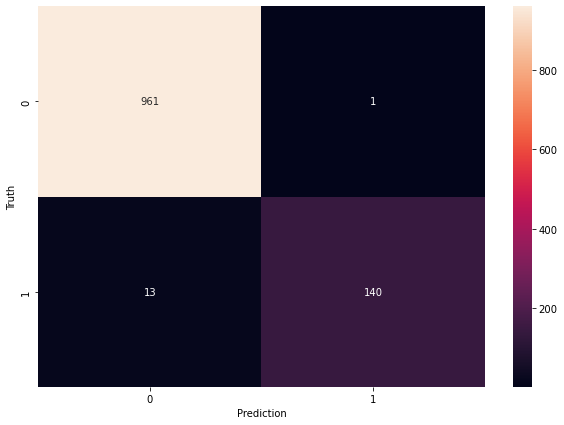

In [18]:
#PRINTING CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [37]:
#USING RANDOM FOREST CLASSIFIER and tf idf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_t',TfidfVectorizer()),    
     ('random_forest', (RandomForestClassifier()))         
])

# fit with X_train and y_train
clf.fit(X_train, Y_train)

# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       962
           1       1.00      0.84      0.91       153

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Text(69.0, 0.5, 'Truth')

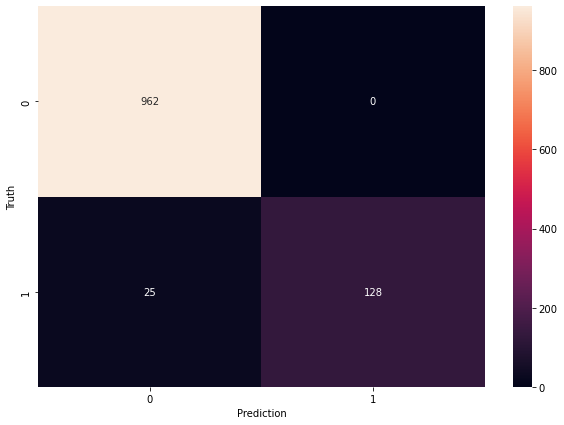

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
# THEREFORE THE MORE ACCURATE MODEL IS THE MODEL HAVING COUNTVECTORIZER AND NAIVE BAYES CLASSIFIER